#CUSTOMER CHURN


In [78]:
#IMPORTING  THE NECESSARY  DEPENDENCIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [79]:
data=pd.read_csv('/content/Telecom Customer Churn Dataset.csv')

In [80]:

data.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [81]:
data.shape

(7043, 21)

In [82]:
data.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [86]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').astype(float)
#The errors='coerce' parameter is used to convert any non-numeric values to NaN.
#And, I have used this 'coerce' function because when I was converting 'total charges' column from 'object type' to 'numerical type'.
# It was showing error that it can't convert some values.And after doing this -->previously there were no missing values but after doing this process I saw that it started showing missing values.
# Or, we can use this also----> data[data == ""] = np.nan

In [89]:
#This code is to check whether a particular value is present inside the dataframe
if 'NaN' in data.values:
    print("Value found in dataframe!")
else:
    print("Value not found in dataframe.")

Value not found in dataframe.


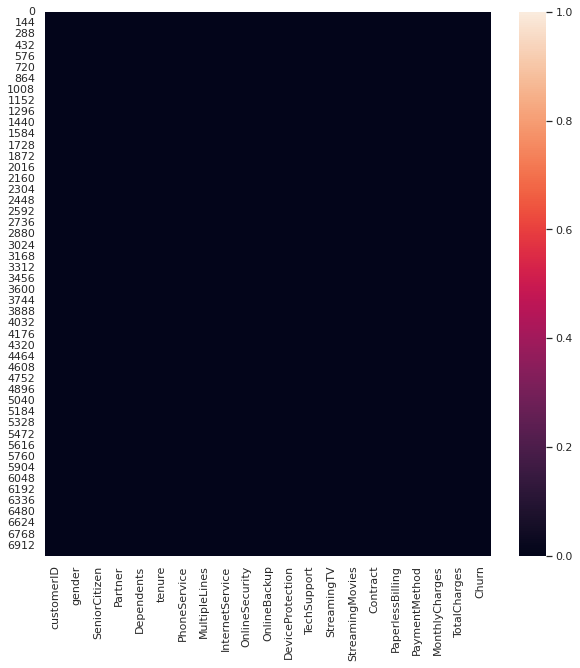

In [88]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull())

In [90]:
data.isnull().sum()
# Null values in the dataset

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [91]:
#There are very less number of missing values.So, here beside imputing the data we can drop it
data=data.dropna()

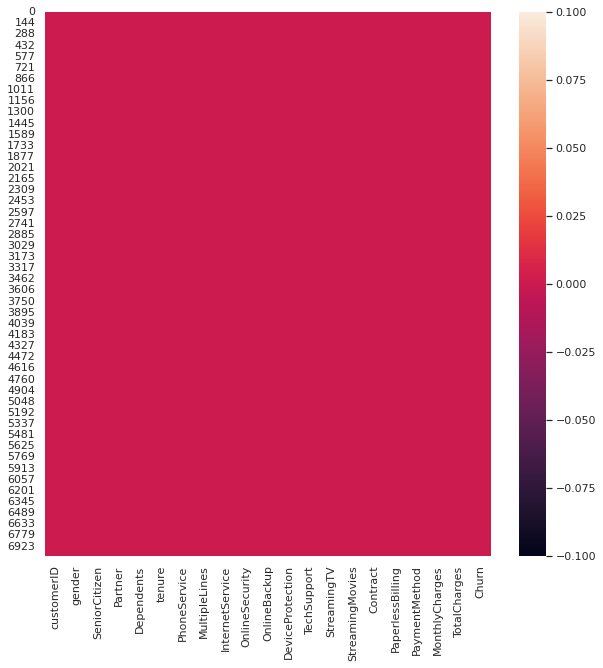

In [92]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull())

In [12]:
data.shape

(7032, 21)

In [13]:
# Making a function to get the "value counts" of specified column
def categories1(column):
    cat = data[column].value_counts()
    return cat


In [14]:
categories1('gender')
                             

Male      3549
Female    3483
Name: gender, dtype: int64

In [15]:
# Making a dataframe where we can easily see the 'column name','no of categories' and 'category names'
table = []
for i in data.columns:
    categories2 = data[i].nunique()
    values = data[i].unique()
    table.append([i, categories2, values])
    final_table=pd.DataFrame(table, columns=['Feature', 'No. of Categories', 'Categories'])

In [16]:
final_table

,Feature,No. of Categories,Categories
0,customerID,7032,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
1,gender,2,"[Female, Male]"
2,SeniorCitizen,2,"[0, 1]"
3,Partner,2,"[Yes, No]"
4,Dependents,2,"[No, Yes]"
5,tenure,72,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
6,PhoneService,2,"[No, Yes]"
7,MultipleLines,3,"[No phone service, No, Yes]"
8,InternetService,3,"[DSL, Fiber optic, No]"
9,OnlineSecurity,3,"[No, Yes, No internet service]"


#DATA VIZUALISATION

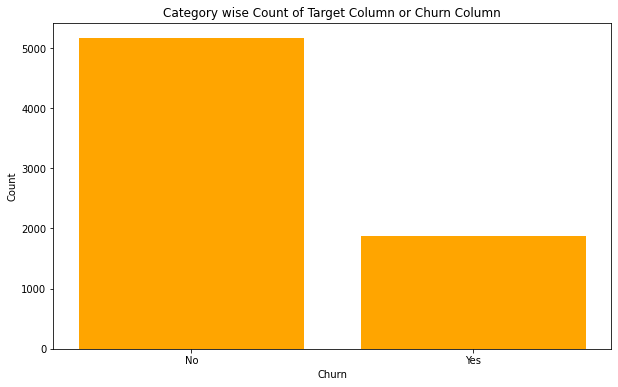

In [17]:
plt.figure(figsize=(10,6))
y = data['Churn'].value_counts()
x = data['Churn'].unique()
plt.bar(x, y, color='orange')
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Category wise Count of Target Column or Churn Column")
plt.show()

In [18]:
categories1('Churn')

No     5163
Yes    1869
Name: Churn, dtype: int64

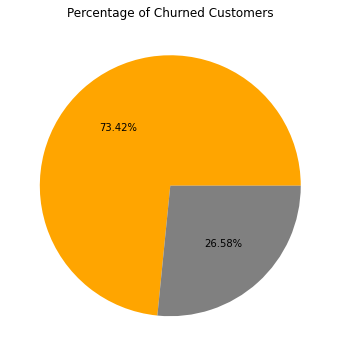

In [19]:
counts = data['Churn'].value_counts()
percentages = counts / counts.sum() * 100
plt.figure(figsize=(10,6))
plt.pie(percentages,colors=['orange', 'gray'], autopct='%0.2f%%')     #Autopct => It is responsible for displaying the percentage of each area
plt.title("Percentage of Churned Customers")
plt.show()

Here, our "target variable" seems to be "imbalanced"
--> Balancing Techniques: 
1.Undersampling: This involves removing some samples from the majority class to balance the class distribution. However, this method may result in a loss of information and is not always effective.

2.Oversampling: This involves adding more samples to the minority class to balance the class distribution. This can be done through techniques such as duplicating existing samples or generating synthetic samples using methods such as SMOTE (Synthetic Minority Over-sampling Technique).

3.Hybrid methods: These combine both undersampling and oversampling techniques to balance the class distribution. This involves removing some samples from the majority class and adding more samples to the minority class.

4.Cost-sensitive learning: This involves assigning different misclassification costs to different classes based on their relative importance. This approach can be used to bias the learning algorithm towards the minority class.

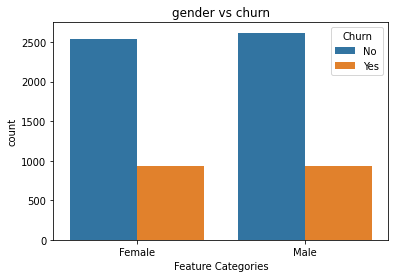

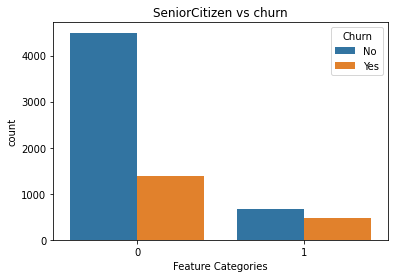

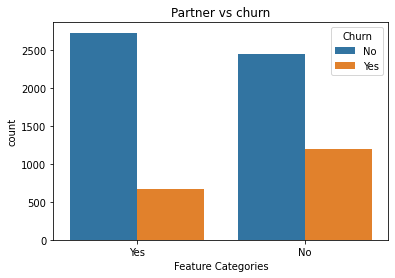

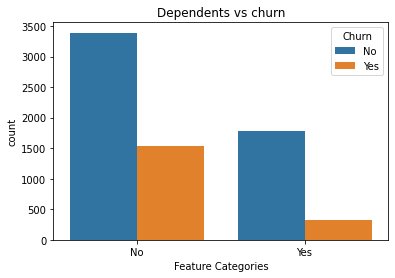

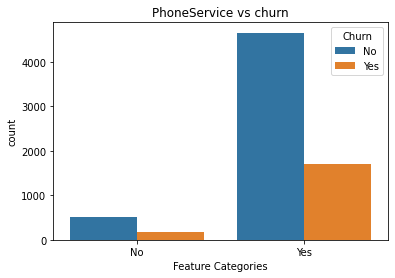

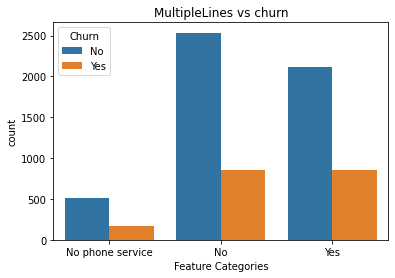

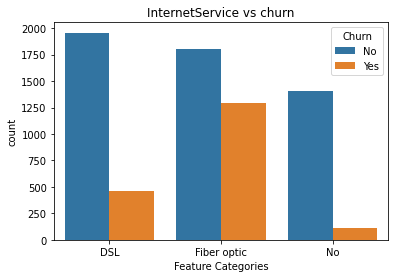

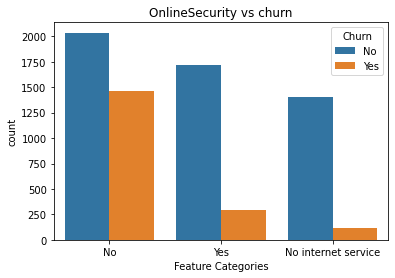

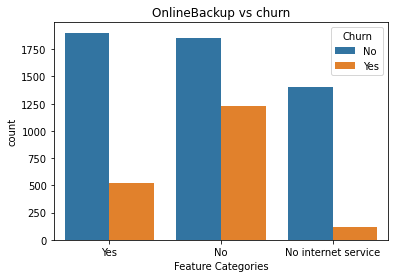

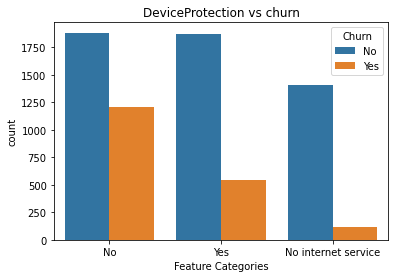

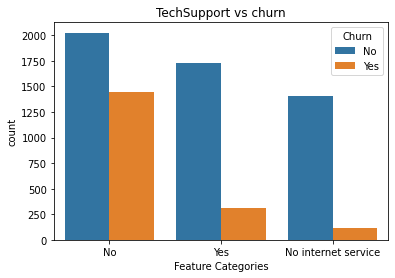

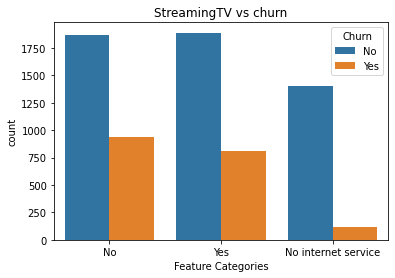

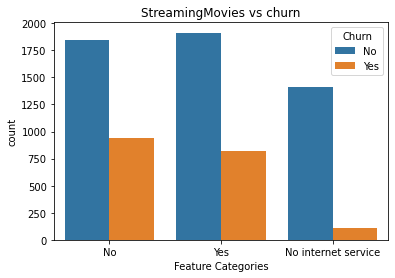

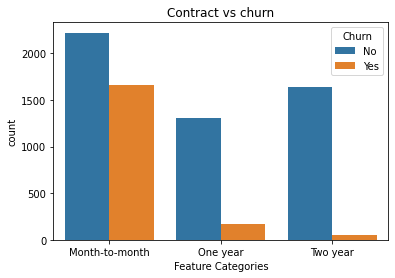

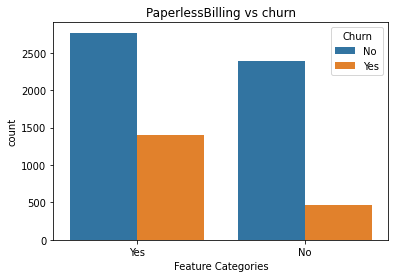

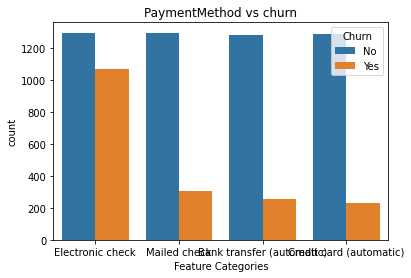

In [20]:

for i, var in enumerate(data.drop(columns=['Churn','TotalCharges','MonthlyCharges','customerID','tenure'])):
   plt.figure(i)
   sns.countplot(data=data,x=var,hue='Churn')
   plt.title(f"{var} vs churn")
   plt.xlabel('Feature Categories')
   plt.ylabel('count')
plt.show()


#1. Gender: There is no such big difference of churn in Male and female
#2. Senior Citizen:There are less no of senior citizens and also in that more number of churn senior citizen as compared to no-churn
#3. Partner: The customer who has no partner are more likely to churn as compared to the customers who have partner.
#4. Dependents: The customers who donot have dependents are more likely to churn.
#5. Contract: The customers who are on  month to month payment system are more likely to churn.
#6.Payment Method: The customer who choose to pay by Electronic payment are the most likely to churn among all the payment methods.

In [22]:
# Removing "Customer ID" columns -as they all are unique and no single customer is repeated twice as we can see above the count of customer id-7043 and the shape of dataframe is also 7043
data=data.drop(columns=('customerID'))
data.shape


(7032, 20)

In [23]:
# Conveting all the categorical columns into numerical columns
dic = {'No': 0, 'Yes': 1}
data_copy=data       #I am putting my "old dataframe" in data for further use and I am converting categorical column to numerical in data_copy
data_copy['Churn'] = data['Churn'].map(dic)

In [24]:
data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [25]:
data_dummy=pd.get_dummies(data_copy)

In [26]:
data_final=pd.get_dummies(data_copy,drop_first=True)

In [27]:
data_final.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [28]:
data_final.shape

(7032, 31)

In [29]:
data_dummy.shape

(7032, 46)

In [30]:
data_dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


Bi variate Analysis

In [31]:
# Relationship between monthly charges and total charges

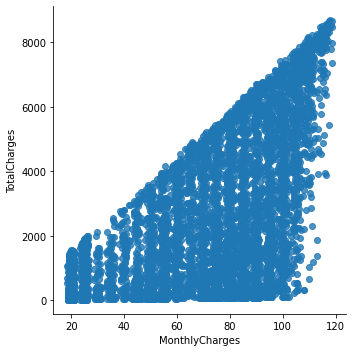

In [32]:
sns.lmplot(data=data_dummy,x='MonthlyCharges',y='TotalCharges',fit_reg=False)
#As the month is increasing -- Total Charge is also increasing.These both are highly correlated

Text(0.5, 1.0, 'Churn on the Basis of Monthly Charges')

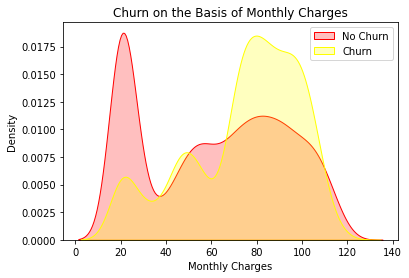

In [33]:
charge=sns.kdeplot(data_dummy.MonthlyCharges[(data_dummy["Churn"]==0)],
                   color='Red',shade=True)
charge=sns.kdeplot(data_dummy.MonthlyCharges[(data_dummy["Churn"]==1)],
                   color='yellow',shade=True)
charge.legend(["No Churn","Churn"])
charge.set_ylabel('Density')
charge.set_xlabel('Monthly Charges')
charge.set_title('Churn on the Basis of Monthly Charges')


#Churn is high when monthly charges are high

In [34]:
#sns.violinplot(data=data_dummy, x="Churn", y="MonthlyCharges")

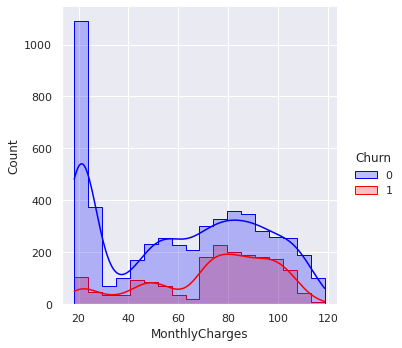

In [35]:
sns.set(style='darkgrid')
sns.displot(data=data_copy, x='MonthlyCharges', hue='Churn', element='step', palette={0: 'blue', 1: 'red'},kde=True)


Text(0.5, 1.0, 'Churn on the Basis of Total Charges')

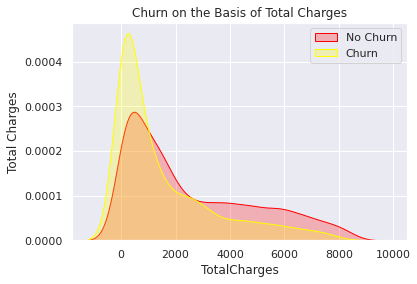

In [36]:
charge=sns.kdeplot(data_dummy.TotalCharges[(data_dummy["Churn"]==0)],
                   color='Red',shade=True)
charge=sns.kdeplot(data_dummy.TotalCharges[(data_dummy["Churn"]==1)],
                   color='yellow',shade=True)
charge.legend(["No Churn","Churn"])
charge.set_ylabel('Total Charges')
charge.set_title('Churn on the Basis of Total Charges')

#here, churn is high when total charges are minimum

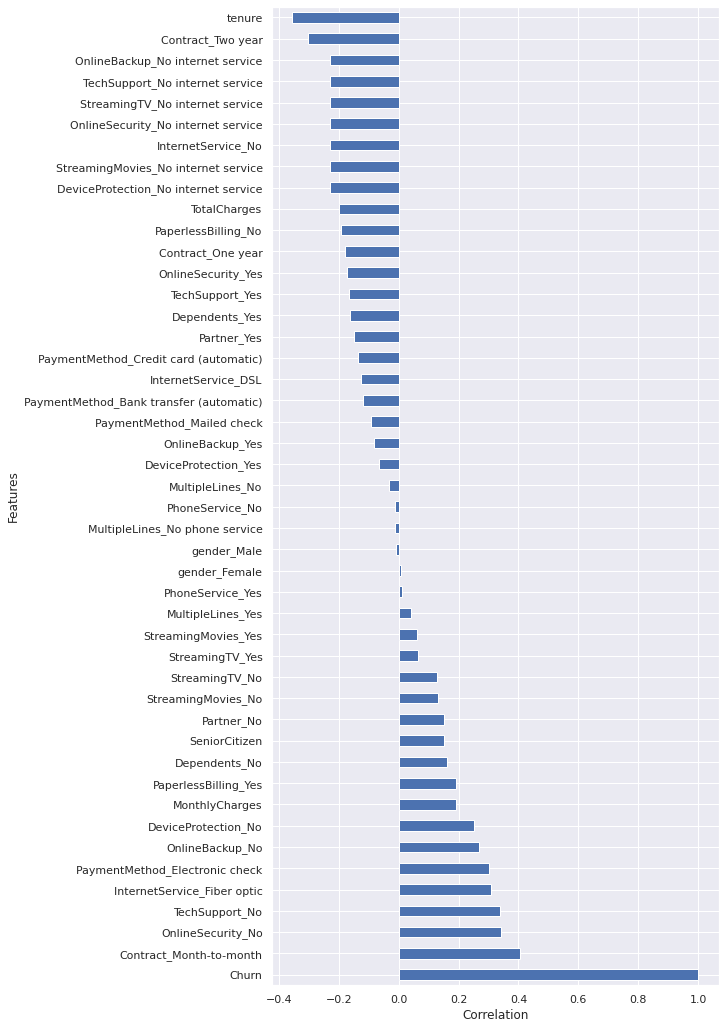

In [37]:
plt.figure(figsize=(8, 18))
corr = data_dummy.corr()['Churn'].sort_values(ascending=False)
ax = corr.plot(kind='barh')
ax.set_xlabel('Correlation')
ax.set_ylabel('Features')
plt.show()

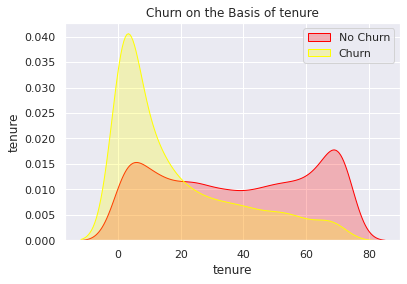

In [38]:
charge=sns.kdeplot(data_dummy.tenure[(data_dummy["Churn"]==0)],
                   color='Red',shade=True)
charge=sns.kdeplot(data_dummy.tenure[(data_dummy["Churn"]==1)],
                   color='yellow',shade=True)
charge.legend(["No Churn","Churn"])
charge.set_ylabel('tenure')
charge.set_title('Churn on the Basis of tenure')
plt.show()

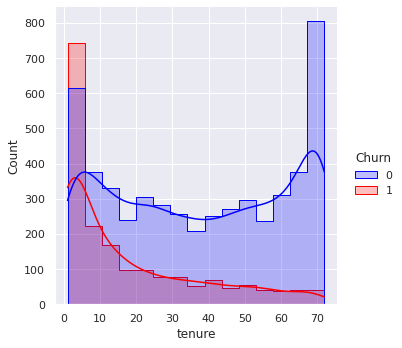

In [39]:
sns.set(style='darkgrid')
sns.displot(data=data_copy, x='tenure', hue='Churn', element='step', palette={0: 'blue', 1: 'red'},kde=True)

In [40]:
#The above graph is showing that : customers who are for less tenure are more probable to churn.

In [93]:

#CHECK FOR OUTLIERS

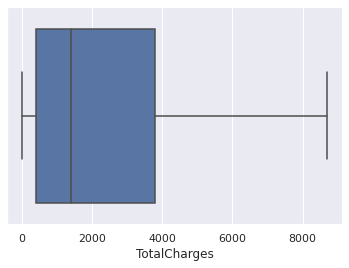

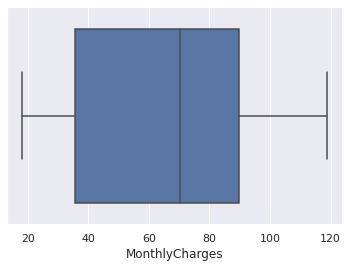

In [94]:
features=['TotalCharges','MonthlyCharges']
for i in features:
  sns.boxplot(x= data_final[i])
  plt.show()

#NO OUTLIERS IN BOTH THE NUMERICAL COLUMNS

# MODEL BUILDING

In [42]:
data_final.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [43]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7032 non-null   int64  
 5   gender_Male                            7032 non-null   uint8  
 6   Partner_Yes                            7032 non-null   uint8  
 7   Dependents_Yes                         7032 non-null   uint8  
 8   PhoneService_Yes                       7032 non-null   uint8  
 9   MultipleLines_No phone service         7032 non-null   uint8  
 10  MultipleLines_Yes                      7032 non-null   uint8  
 11  Inte

In [44]:
X=data_final.drop('Churn',axis=1)

In [45]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [46]:
X.shape

(7032, 30)

In [47]:
y=data_final['Churn']

In [48]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [49]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(5274, 30)
(1758, 30)
(5274,)
(1758,)


In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [53]:
sc.fit(X_train)
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)


In [54]:
X_train_sc

array([[-0.4377158 , -0.74817539, -0.52638   , ..., -0.53100285,
        -0.71708569, -0.54360352],
       [-0.4377158 , -0.05601627,  0.85826225, ...,  1.88322907,
        -0.71708569, -0.54360352],
       [-0.4377158 ,  0.59542761,  1.41543565, ..., -0.53100285,
        -0.71708569, -0.54360352],
       ...,
       [-0.4377158 , -0.9517516 ,  0.54651046, ..., -0.53100285,
         1.39453348, -0.54360352],
       [-0.4377158 ,  0.71757334, -1.48982568, ..., -0.53100285,
        -0.71708569, -0.54360352],
       [ 2.28458741, -0.50388393,  0.29777233, ..., -0.53100285,
         1.39453348, -0.54360352]])

1. LOGISTIC REGRESSION

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
model1=LogisticRegression()

In [57]:
model1.fit(X_train_sc,y_train)

LogisticRegression()

In [58]:
y_pred=model1.predict(X_test_sc)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1300
           1       0.61      0.52      0.56       458

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758



2.Model2- Naive Bayes Classifier

In [60]:
from sklearn.naive_bayes import GaussianNB
model2=GaussianNB()

In [61]:
model2.fit(X_train_sc,y_train)

GaussianNB()

In [62]:
y_pred2=model2.predict(X_test_sc)

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred2)

array([[757, 543],
       [ 61, 397]])

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.58      0.71      1300
           1       0.42      0.87      0.57       458

    accuracy                           0.66      1758
   macro avg       0.67      0.72      0.64      1758
weighted avg       0.79      0.66      0.68      1758



MODEL 3: Decision Tree Classifier

In [65]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()

In [66]:
model3.fit(X_train_sc,y_train)

DecisionTreeClassifier()

In [67]:
y_pred3=model3.predict(X_test_sc)
y_pred3

array([0, 0, 1, ..., 0, 1, 0])

In [68]:
confusion_matrix(y_test,y_pred3)

array([[1040,  260],
       [ 238,  220]])

In [69]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1300
           1       0.46      0.48      0.47       458

    accuracy                           0.72      1758
   macro avg       0.64      0.64      0.64      1758
weighted avg       0.72      0.72      0.72      1758



Model4: Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
model4= RandomForestClassifier()

In [72]:
model4.fit(X_train_sc,y_train)

RandomForestClassifier()

In [73]:
y_pred4=model4.predict(X_test_sc)
y_pred4

array([0, 0, 1, ..., 0, 1, 0])

In [74]:
confusion_matrix(y_test,y_pred4)

array([[1160,  140],
       [ 245,  213]])

In [75]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1300
           1       0.60      0.47      0.53       458

    accuracy                           0.78      1758
   macro avg       0.71      0.68      0.69      1758
weighted avg       0.77      0.78      0.77      1758



In [76]:
# Highest Accuracy - LOGISTIC REGRESSION

# WE KNOW THAT OUR DATASET IS IMBALANCE:
-Here, we will use the 'upsampling' method of balancing the dataset.
-So, we will now work on balancing and then check the accuracy.
-There are 2 famous methods  used for 'upsampling'


1.SMOTETomek

2.RandomOverSampler

These  both methods are present inside the 'imblearn' library.



Here, we have used the second method---> RandomOverSampler

In [100]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 10.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [105]:
#SMOTETomek
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler

In [106]:
rs=RandomOverSampler(sampling_strategy=1,random_state=42)    #or -->   X_resampled, y_resampled = RandomOverSampler(sampling_strategy='minority').fit_resample(X, y)
#Suppose in our 'Target variable'  1--> 500 and 0--->
                               #And when we apply 'RandomOverSampler' as ratio=0.5
                              # Now,it will go and see 'majority class' then it will find '1' is majority
                              # Then, it will calculate [0.5*500]---->250
                              # Then it will add that much quantity so that the 'minority' value will become ---->250
                              #So, here 150 will be added to minority-100 to become --->250
                              #In this case we are taking 'ratio'=1;which will try to make the minority class equal to majority class

In [112]:
X1,y1=rs.fit_resample(X,y)

In [124]:
X1.shape,y1.shape       #New dataset shape

((10326, 30), (10326,))

In [115]:
X.shape,y.shape         #old dataset shape

((7032, 30), (7032,))

In [118]:
from collections import Counter

In [120]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y1)))

Original dataset shape Counter({0: 5163, 1: 1869})
Resampled dataset shape Counter({0: 5163, 1: 5163})


In [121]:
#The data is balanced now

In [122]:
X1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


# FEATURE SCALING

In [123]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.25,random_state=42)

In [125]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(7744, 30)
(2582, 30)
(7744,)
(2582,)


In [126]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [132]:
sc.fit(X_train)
X1_train_sc=sc.transform(X1_train)
X1_test_sc=sc.transform(X1_test)

#MODEL BUILDING

5. Logistic Regression-on balanced dataset

In [128]:
from sklearn.linear_model import LogisticRegression

In [133]:
model5=LogisticRegression()
model5.fit(X1_train_sc,y1_train)

LogisticRegression()

In [134]:
y_pred5=model5.predict(X1_test_sc)
y_pred5

array([1, 0, 0, ..., 1, 1, 1])

In [136]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,y_pred5))


              precision    recall  f1-score   support

           0       0.79      0.72      0.76      1304
           1       0.74      0.80      0.77      1278

    accuracy                           0.76      2582
   macro avg       0.76      0.76      0.76      2582
weighted avg       0.77      0.76      0.76      2582



6. Random Forest Classifier- on balanced Dataset

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
model6=RandomForestClassifier()

In [139]:
model6.fit(X1_train_sc,y1_train)

RandomForestClassifier()

In [140]:
y_pred6=model6.predict(X1_test_sc)
y_pred6

array([1, 0, 0, ..., 1, 1, 1])

In [141]:
print(classification_report(y1_test,y_pred6))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      1304
           1       0.85      0.95      0.90      1278

    accuracy                           0.89      2582
   macro avg       0.90      0.89      0.89      2582
weighted avg       0.90      0.89      0.89      2582



7. Decision Tree Classifier

In [142]:
from sklearn.tree import DecisionTreeClassifier
model7=DecisionTreeClassifier()

In [143]:
model7.fit(X1_train_sc,y1_train)

DecisionTreeClassifier()

In [145]:
y_pred7=model7.predict(X1_test_sc)
y_pred7

array([1, 0, 0, ..., 1, 1, 1])

In [147]:
print(classification_report(y1_test,y_pred7))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1304
           1       0.81      0.94      0.87      1278

    accuracy                           0.86      2582
   macro avg       0.87      0.86      0.86      2582
weighted avg       0.87      0.86      0.86      2582



8.NAVE BAYES

In [149]:
from sklearn.naive_bayes import GaussianNB
model8=GaussianNB()

In [150]:
model8.fit(X1_train_sc,y1_train)

GaussianNB()

In [154]:
y_pred8=model8.predict(X1_test_sc)
y_pred8

array([1, 0, 0, ..., 1, 1, 1])

In [155]:
print(classification_report(y1_test,y_pred8))

              precision    recall  f1-score   support

           0       0.84      0.57      0.68      1304
           1       0.67      0.89      0.77      1278

    accuracy                           0.73      2582
   macro avg       0.76      0.73      0.72      2582
weighted avg       0.76      0.73      0.72      2582



In [156]:
#Highest accuracy of 89% is of Random Forest after balancing the dataset